In [12]:
from pymopt.voxcel import VoxcelPlateModel

from scipy import stats
import numpy as np
import pandas as pa

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

# Computation Results of single-solidmodel and mcml

## Total diffuse reflectance and total transmittance

### slab of turbid medium

In [3]:

nPh = 500000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'xy_size':3,
    'voxcel_space':0.001,
}
model = VoxcelPlateModel(nPh = nPh)
model.built(**params)
model = model.start()


Model Size: 198 Mbyte

###### Start ######

Progress: 34.205 [％]
Calculation time: 0 minutes 5 seconds.

Progress: 64.257 [％]
Calculation time: 0 minutes 9 seconds.

Progress: 84.851 [％]
Calculation time: 0 minutes 13 seconds.

Progress: 96.515 [％]
Calculation time: 0 minutes 16 seconds.

Progress: 99.805 [％]
Calculation time: 0 minutes 17 seconds.

Progress: 100.0 [％]
Calculation time: 0 minutes 18 seconds.


###### Finish ######
Maximum step number: 77
######
Mean Rd 0.090923
Mean Tt 0.628499

Calculation time: 0 minutes 18 seconds.


### Semi-infinite turbid medium that has mismatched refractive index with the ambient medium

In [4]:
nPh = 100000
params = {
    'thickness':[10],
    'ms':[90],
    'ma':[10],
    'g':[0.],
    'n':[1.5],
    'n_air':1.,
    'xy_size':10,
    'voxcel_space':0.1,
}

model = VoxcelPlateModel(nPh = nPh)
model.built(**params)
model = model.start()

Model Size: 1 Mbyte

###### Start ######

Progress: 5.418 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 13.152 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 23.686 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 34.859 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 43.322 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 50.642 [％]
Calculation time: 0 minutes 3 seconds.

Progress: 99.614 [％]
Calculation time: 0 minutes 4 seconds.


###### Finish ######
Maximum step number: 175
######
Mean Rd 0.206392
Mean Tt 0.000000

Calculation time: 0 minutes 4 seconds.


## Angularly resolved diffuse reflectance and transmittance

In [8]:

nPh = 500000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'xy_size':4,
    'voxcel_space':0.001,
}

model = VoxcelPlateModel(nPh = nPh)
model.built(**params)
model = model.start()

rez = model.getResult()
v_result = rez["v"]
w_result = rez["w"]
Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Model Size: 352 Mbyte

###### Start ######

Progress: 34.18 [％]
Calculation time: 0 minutes 5 seconds.

Progress: 64.324 [％]
Calculation time: 0 minutes 9 seconds.

Progress: 84.906 [％]
Calculation time: 0 minutes 13 seconds.

Progress: 96.497 [％]
Calculation time: 0 minutes 16 seconds.

Progress: 99.812 [％]
Calculation time: 0 minutes 17 seconds.


###### Finish ######
Maximum step number: 61
######
Mean Rd 0.091133
Mean Tt 0.628540

Calculation time: 0 minutes 18 seconds.


Trancemittance


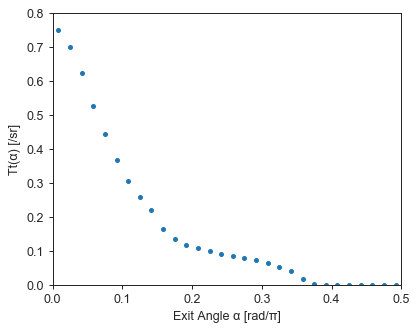

In [9]:
print('Trancemittance')
nn = 30
alpha,Tta = AngularyResolved(v_result[:,Tt_index],w_result[Tt_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Tta,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Tt(α) [/sr]')
plt.xlim(0,0.5)
plt.ylim(0,0.8)
plt.show()

Refrected


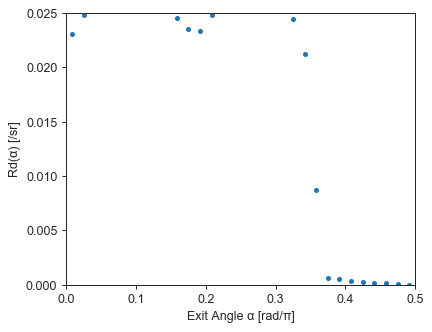

In [10]:
print('Refrected')
nn = 30
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
plt.xlim(0,0.5)
plt.ylim(0,0.025)
plt.show()

In [13]:
df_ = pa.DataFrame(np.array([alpha/np.pi,Rda,Tta]).T,columns = ['Angle','Rd','Tt'])
df_.to_csv('result/angle.csv',index=None)

## Radially resolved diffuse reflectance

In [15]:
nPh = 500000
params = {
    'thickness':[10],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
    'xy_size':10,
    'voxcel_space':0.1,
}

model = VoxcelPlateModel(nPh = nPh)
model.built(**params)
model = model.start()

rezA = model.getResult()
p_resultA = rezA["p"]
v_resultA = rezA["v"]
w_resultA = rezA["w"]
Tt_indexA = np.where(v_resultA[2]>0)[0]
Rd_indexA = np.where(v_resultA[2]<0)[0]

Model Size: 1 Mbyte

###### Start ######

Progress: 0.615 [％]
Calculation time: 0 minutes 0 seconds.

Progress: 1.96 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 4.676 [％]
Calculation time: 0 minutes 2 seconds.

Progress: 9.015 [％]
Calculation time: 0 minutes 5 seconds.

Progress: 20.779 [％]
Calculation time: 0 minutes 10 seconds.

Progress: 36.716 [％]
Calculation time: 0 minutes 19 seconds.

Progress: 52.233 [％]
Calculation time: 0 minutes 32 seconds.

Progress: 65.056 [％]
Calculation time: 0 minutes 50 seconds.

Progress: 74.949 [％]
Calculation time: 1 minutes 18 seconds.

Progress: 82.115 [％]
Calculation time: 1 minutes 57 seconds.

Progress: 87.279 [％]
Calculation time: 2 minutes 50 seconds.

Progress: 90.959 [％]
Calculation time: 4 minutes 6 seconds.

Progress: 93.847 [％]
Calculation time: 6 minutes 3 seconds.

Progress: 99.999 [％]
Calculation time: 7 minutes 14 seconds.


###### Finish ######
Maximum step number: 18430
######
Mean Rd 0.724552
Mean Tt 0.000009

Calculatio

In [16]:
nPh = 500000
params = {
    'thickness':[10],
    'ms':[10],
    'ma':[0.1],
    'g':[0.],
    'n':[1.],
    'n_air':1.,
    'xy_size':10,
    'voxcel_space':0.1,
}

model = VoxcelPlateModel(nPh = nPh)
model.built(**params)
model = model.start()

rezB = model.getResult()
p_resultB = rezB["p"]
v_resultB = rezB["v"]
w_resultB = rezB["w"]
Tt_indexB = np.where(v_resultB[2]>0)[0]
Rd_indexB = np.where(v_resultB[2]<0)[0]

Model Size: 1 Mbyte

###### Start ######

Progress: 12.799 [％]
Calculation time: 0 minutes 1 seconds.

Progress: 26.35 [％]
Calculation time: 0 minutes 2 seconds.

Progress: 41.475 [％]
Calculation time: 0 minutes 4 seconds.

Progress: 55.908 [％]
Calculation time: 0 minutes 7 seconds.

Progress: 67.715 [％]
Calculation time: 0 minutes 11 seconds.

Progress: 76.721 [％]
Calculation time: 0 minutes 17 seconds.

Progress: 83.339 [％]
Calculation time: 0 minutes 26 seconds.

Progress: 88.144 [％]
Calculation time: 0 minutes 38 seconds.

Progress: 91.669 [％]
Calculation time: 0 minutes 57 seconds.

Progress: 99.461 [％]
Calculation time: 1 minutes 20 seconds.


###### Finish ######
Maximum step number: 1620
######
Mean Rd 0.721661
Mean Tt 0.000010

Calculation time: 1 minutes 25 seconds.


In [17]:
nn = 200
dr = 0.005

alphaA,RdrA = radialDistance(p_resultA[:,Rd_indexA],w_resultA[Rd_indexA],nn,dr)
alphaB,RdrB = radialDistance(p_resultB[:,Rd_indexB],w_resultB[Rd_indexB],nn,dr)

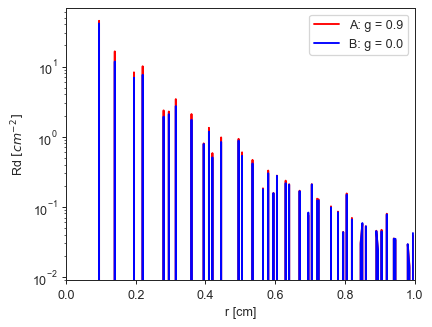

In [18]:

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,RdrA,'-',c = 'red',label = 'A: g = 0.9')
plt.plot(alphaB,RdrB,'-',c = 'blue',label = "B: g = 0.0")
plt.yscale('log')
plt.xlim(0,1)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

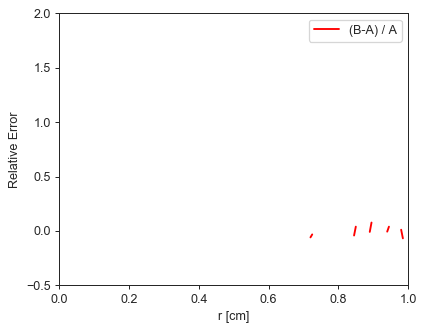

In [19]:
plt.figure(figsize=(5,4),dpi=90)
plt.plot(alphaA,(RdrB-RdrA)/RdrA,'-',c = 'red',label = '(B-A) / A')
plt.xlim(0,1)
plt.ylim(-0.5,2)
plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Relative Error')
plt.show()

In [20]:
df_ = pa.DataFrame(np.array([alphaA,RdrA,RdrB]).T,columns = ['r cm','A_Rd','B_Rd'])
df_.to_csv('result/equivalent.csv',index=None)

In [ ]:
###### まだ　##### Fluenceのパラメーターはどうやっていれる？？

## Depth resolved internal fluence

In [ ]:
nPh = 10000

nr = 500
nz = 200
dr = 0.01
dz = 0.01


print("######  n = 1.  ######")
thickness=[200]
ms = [100]
ma = [0.1]
g = [0.9]
n = [1.]
n_air = 1.

model = SolidPlateModel(thickness,ma,ms,g,n,n_air)
fluence = IntarnalFluence(nr,nz,dr,dz)
monte = MonteCalroPh(model,fluence)
p_resultA,v_resultA,w_resultA,trace = monte.startMonteCalro(nPh)
fluenceA = fluence.Arz
Tt_index = np.where(v_resultA[2]>0)[0]
Rd_index = np.where(v_resultA[2]<0)[0]
print('######')
print('Mean Tt %0.6f'%(w_resultA[Tt_index].sum()/nPh))
print('Mean Rd %0.6f'%(w_resultA[Rd_index].sum()/nPh))
print()


print("######  n = 1.37  ######")
thickness=[200]
ms = [100]
ma = [0.1]
g = [0.9]
n = [1.37]
n_air = 1.

model = SolidPlateModel(thickness,ma,ms,g,n,n_air)
fluence = IntarnalFluence(nr,nz,dr,dz)
monte = MonteCalroPh(model,fluence)
p_resultB,v_resultB,w_resultB,trace = monte.startMonteCalro(nPh)
fluenceB = fluence.Arz
Tt_index = np.where(v_resultB[2]>0)[0]
Rd_index = np.where(v_resultB[2]<0)[0]
print('######')
print('Mean Tt %0.6f'%(w_resultB[Tt_index].sum()/nPh))
print('Mean Rd %0.6f'%(w_resultB[Rd_index].sum()/nPh))
print()

In [ ]:
da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nr)])
aaa = ma[0]*nPh*dz
phi_zA = (fluenceA.T/aaa).T.sum(0)
phi_zB = (fluenceB.T/aaa).T.sum(0)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(fluence.getArrayZ(),phi_zA,c = 'red',label = 'n = 1.0')
plt.plot(fluence.getArrayZ(),phi_zB,c = 'blue',label = 'n = 1.37')
plt.xlabel('Z [cm]')
plt.ylabel('Fluence [-]')
plt.legend()
plt.yscale('log')
plt.xlim(0,1)
plt.ylim(0.5,10)
plt.show()

In [ ]:
df_ = pa.DataFrame(np.array([fluence.getArrayZ(),phi_zA,phi_zB]).T,columns = ['z cm','n_1','n_1.37'])
df_.to_csv('result/fluence_z.csv',index=None)

# Multi-layered Tissues

## Refrective and transmittnace rate

In [21]:
nPh = 1000000
model = VoxcelPlateModel(nPh = nPh)
params = {
    'thickness':[0.1,0.1,0.2],
    'ms':[100,10,10],
    'ma':[1,1,2],
    'g':[0.9,0,0.7],
    'n':[1.37,1.37,1.37],
    'n_air':1.,
    'xy_size':4,
    'voxcel_space':0.002,
}
model.built(**params)
model = model.start()

rez = model.getResult()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

Model Size: 809 Mbyte

###### Start ######

Progress: 0.196 [％]
Calculation time: 0 minutes 7 seconds.

Progress: 0.685 [％]
Calculation time: 0 minutes 17 seconds.

Progress: 2.37 [％]
Calculation time: 0 minutes 41 seconds.

Progress: 9.901 [％]
Calculation time: 2 minutes 5 seconds.

Progress: 30.339 [％]
Calculation time: 5 minutes 3 seconds.

Progress: 59.914 [％]
Calculation time: 8 minutes 44 seconds.

Progress: 86.974 [％]
Calculation time: 11 minutes 51 seconds.

Progress: 98.833 [％]
Calculation time: 13 minutes 17 seconds.

Progress: 99.997 [％]
Calculation time: 13 minutes 43 seconds.


###### Finish ######
Maximum step number: 709
######
Mean Rd 0.242363
Mean Tt 0.080660

Calculation time: 13 minutes 47 seconds.


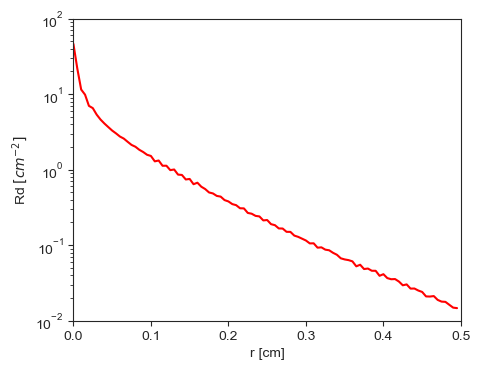

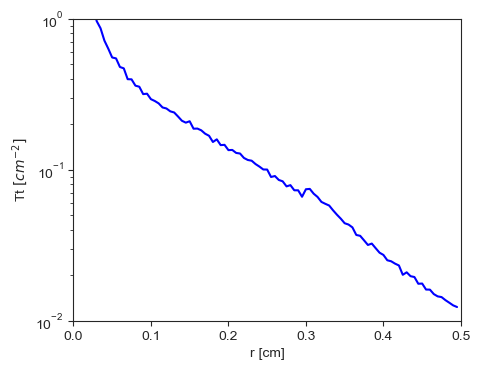

In [22]:
nn = 100
dr = 0.005

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()

In [23]:
df_ = pa.DataFrame(np.array([alphaRd,Rd,Tt]).T,columns = ['r cm','Rd','Tt'])
df_.to_csv('result/multi_rt_test.csv',index=None)